# Assignment 2.2: Convolutional Neural Network
Student Name 1: ...

Student Name 2: ...

Student Name 3: ...

## German Traffic Sign Benchmark

Download full data set from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

In [ ]:
!wget http://www.dia.fi.upm.es/~lbaumela/FullIJCNN2013.zip
!unzip FullIJCNN2013.zip

In [1]:
import numpy as np
import cv2

IMG_HEIGHT = 600
SIGN_SIZE = (224, 224)

# Function for reading the images
def readImages(rootpath, images_range, signs_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))
    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        sign_resized = cv2.resize(sign, SIGN_SIZE)
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels

In [2]:
import numpy as np
import cv2

IMG_HEIGHT = 600
SIGN_SIZE = (224, 224)

# Function for reading the images
def readImages(rootpath, images_range, signs_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))
    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        sign_resized = cv2.resize(sign, SIGN_SIZE)
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels

In [3]:
# The German Traffic Sign Recognition Benchmark
train_images, train_files, train_signs, train_bboxes, train_labels = readImages('FullIJCNN2013', range(0,600), range(0,852))
test_images, test_files, test_signs, test_bboxes, test_labels = readImages('FullIJCNN2013', range(600,900), range(852,1213))

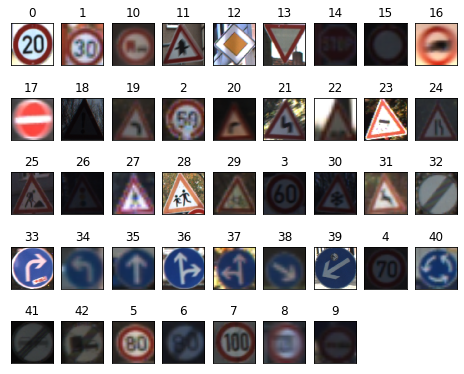

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(train_labels)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(train_labels, class_names[i]))[0]
    plt.imshow(cv2.cvtColor(train_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
from sklearn.utils import shuffle
train_files, train_signs, train_bboxes, train_labels = shuffle(train_files, train_signs, train_bboxes, train_labels)
# plt.imshow(cv2.cvtColor(train_images.get(train_files[0])[0], cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(train_signs[0], cv2.COLOR_BGR2RGB))
# plt.show()
# print(train_bboxes[0])
# print(train_labels[0])

# Data pre-processing
tr_signs = np.array(train_signs)[0:600]
tr_labels = np.array(train_labels)[0:600]
va_signs = np.array(train_signs)[600:852]
va_labels = np.array(train_labels)[600:852]
te_signs = np.array(test_signs)
te_labels = np.array(test_labels)

tr_signs = tr_signs.astype('float32')
va_signs = va_signs.astype('float32')
te_signs = te_signs.astype('float32')
tr_signs /= 255.0
va_signs /= 255.0
te_signs /= 255.0

from keras.utils import np_utils
tr_labels = np_utils.to_categorical(tr_labels, num_classes)
va_labels = np_utils.to_categorical(va_labels, num_classes)
te_labels = np_utils.to_categorical(te_labels, num_classes)

Using TensorFlow backend.


In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

input_shape = (SIGN_SIZE[0], SIGN_SIZE[1], 3)

cnn = Sequential()
cnn.add(Conv2D(8, kernel_size=(3, 3), padding='same', input_shape=input_shape))
cnn.add(Activation('relu'))
cnn.add(Conv2D(16, strides=(2, 2), kernel_size=(3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(32, strides=(2, 2), kernel_size=(3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(num_classes))
cnn.add(Activation('softmax'))

opt = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
cnn.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
cnn.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
activation_71 (Activation)   (None, 224, 224, 8)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
activation_72 (Activation)   (None, 112, 112, 16)      0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
activation_73 (Activation)   (None, 56, 56, 32)      

In [42]:
from time import time

cnn.fit(tr_signs, tr_labels,
        batch_size=50,
        epochs=20,
        verbose=2,
        validation_data=(va_signs, va_labels))

start = time()
loss, acc = cnn.evaluate(te_signs, te_labels, verbose=1)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Train on 600 samples, validate on 252 samples
Epoch 1/20
 - 2s - loss: 3.6212 - accuracy: 0.0650 - val_loss: 3.5069 - val_accuracy: 0.0794
Epoch 2/20
 - 2s - loss: 3.3260 - accuracy: 0.1467 - val_loss: 3.4434 - val_accuracy: 0.2063
Epoch 3/20
 - 2s - loss: 3.1522 - accuracy: 0.2400 - val_loss: 3.3235 - val_accuracy: 0.2302
Epoch 4/20
 - 2s - loss: 2.8874 - accuracy: 0.3383 - val_loss: 3.0701 - val_accuracy: 0.2897
Epoch 5/20
 - 2s - loss: 2.4920 - accuracy: 0.4383 - val_loss: 2.7110 - val_accuracy: 0.3730
Epoch 6/20
 - 2s - loss: 2.1036 - accuracy: 0.4950 - val_loss: 2.4469 - val_accuracy: 0.4444
Epoch 7/20
 - 2s - loss: 1.8608 - accuracy: 0.5583 - val_loss: 2.2132 - val_accuracy: 0.5000
Epoch 8/20
 - 2s - loss: 1.4632 - accuracy: 0.6800 - val_loss: 2.1503 - val_accuracy: 0.5516
Epoch 9/20
 - 2s - loss: 1.4171 - accuracy: 0.6750 - val_loss: 2.0741 - val_accuracy: 0.5675
Epoch 10/20
 - 2s - loss: 1.1211 - accuracy: 0.7433 - val_loss: 1.8019 - val_accuracy: 0.6230
Epoch 11/20
 - 2s - los

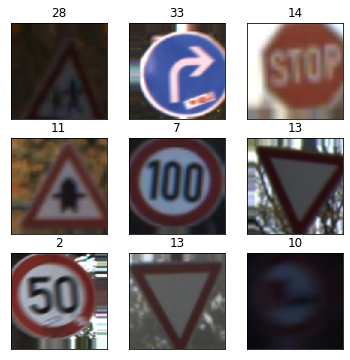

In [43]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, fill_mode='nearest')
datagen.fit(tr_signs, augment=True)

for x_batch, y_batch in datagen.flow(tr_signs, tr_labels, batch_size=9):
    # create a grid of 3x3 images
    fig = plt.figure(figsize=(6,6))
    for i in range(0, 9):
        ax = fig.add_subplot(3, 3, 1 + i, xticks=[], yticks=[])
        ax.set_title(np.argmax(y_batch[i]))
        plt.imshow(cv2.cvtColor(x_batch[i], cv2.COLOR_BGR2RGB))
    # show the plot
    plt.show()
    break

In [44]:
batch_size = 16
train_steps = int(len(tr_signs) / batch_size)
valid_steps = int(len(va_signs) / batch_size)
data = cnn.fit_generator(datagen.flow(tr_signs, tr_labels, batch_size=batch_size), 
                         epochs=50, 
                         steps_per_epoch=train_steps, 
                         verbose=2, 
                         validation_data=(va_signs, va_labels), 
                         validation_steps=valid_steps)

start = time()
loss, acc = cnn.evaluate(te_signs, te_labels, verbose=0)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Epoch 1/100
 - 4s - loss: 4.0341 - accuracy: 0.0942 - val_loss: 3.4492 - val_accuracy: 0.1310
Epoch 2/100
 - 4s - loss: 3.1470 - accuracy: 0.1832 - val_loss: 2.8207 - val_accuracy: 0.3016
Epoch 3/100
 - 4s - loss: 2.5592 - accuracy: 0.3322 - val_loss: 2.2783 - val_accuracy: 0.3849
Epoch 4/100
 - 4s - loss: 2.2335 - accuracy: 0.3970 - val_loss: 2.1665 - val_accuracy: 0.4246
Epoch 5/100
 - 4s - loss: 2.0577 - accuracy: 0.4392 - val_loss: 1.8937 - val_accuracy: 0.5317
Epoch 6/100
 - 4s - loss: 1.8468 - accuracy: 0.4863 - val_loss: 1.9385 - val_accuracy: 0.5357
Epoch 7/100
 - 4s - loss: 1.8418 - accuracy: 0.5034 - val_loss: 1.8004 - val_accuracy: 0.4841
Epoch 8/100
 - 4s - loss: 1.6798 - accuracy: 0.5084 - val_loss: 1.9545 - val_accuracy: 0.5238
Epoch 9/100
 - 4s - loss: 1.7520 - accuracy: 0.5034 - val_loss: 1.7625 - val_accuracy: 0.5357
Epoch 10/100
 - 4s - loss: 1.6319 - accuracy: 0.5308 - val_loss: 1.9362 - val_accuracy: 0.5198
Epoch 11/100
 - 4s - loss: 1.4133 - accuracy: 0.5736 - val_

Epoch 88/100
 - 4s - loss: 0.4594 - accuracy: 0.8598 - val_loss: 2.4519 - val_accuracy: 0.5714
Epoch 89/100
 - 4s - loss: 0.4980 - accuracy: 0.8438 - val_loss: 2.2177 - val_accuracy: 0.5635
Epoch 90/100
 - 4s - loss: 0.4243 - accuracy: 0.8784 - val_loss: 2.1456 - val_accuracy: 0.5992
Epoch 91/100
 - 4s - loss: 0.4166 - accuracy: 0.8767 - val_loss: 2.3625 - val_accuracy: 0.5714
Epoch 92/100
 - 4s - loss: 0.3648 - accuracy: 0.8767 - val_loss: 2.4303 - val_accuracy: 0.5635
Epoch 93/100
 - 4s - loss: 0.3738 - accuracy: 0.8836 - val_loss: 2.4186 - val_accuracy: 0.5913
Epoch 94/100
 - 4s - loss: 0.4971 - accuracy: 0.8459 - val_loss: 2.2341 - val_accuracy: 0.5635
Epoch 95/100
 - 4s - loss: 0.4257 - accuracy: 0.8750 - val_loss: 2.3744 - val_accuracy: 0.5476
Epoch 96/100
 - 4s - loss: 0.3502 - accuracy: 0.8887 - val_loss: 2.4458 - val_accuracy: 0.5992
Epoch 97/100
 - 4s - loss: 0.4974 - accuracy: 0.8594 - val_loss: 2.3697 - val_accuracy: 0.5873
Epoch 98/100
 - 4s - loss: 0.3869 - accuracy: 0.88

# CIFAR 100 Dataset

In [45]:
from keras.datasets import cifar100
(_x_train, _y_train), (_x_test, _y_test) = cifar100.load_data(label_mode='fine')

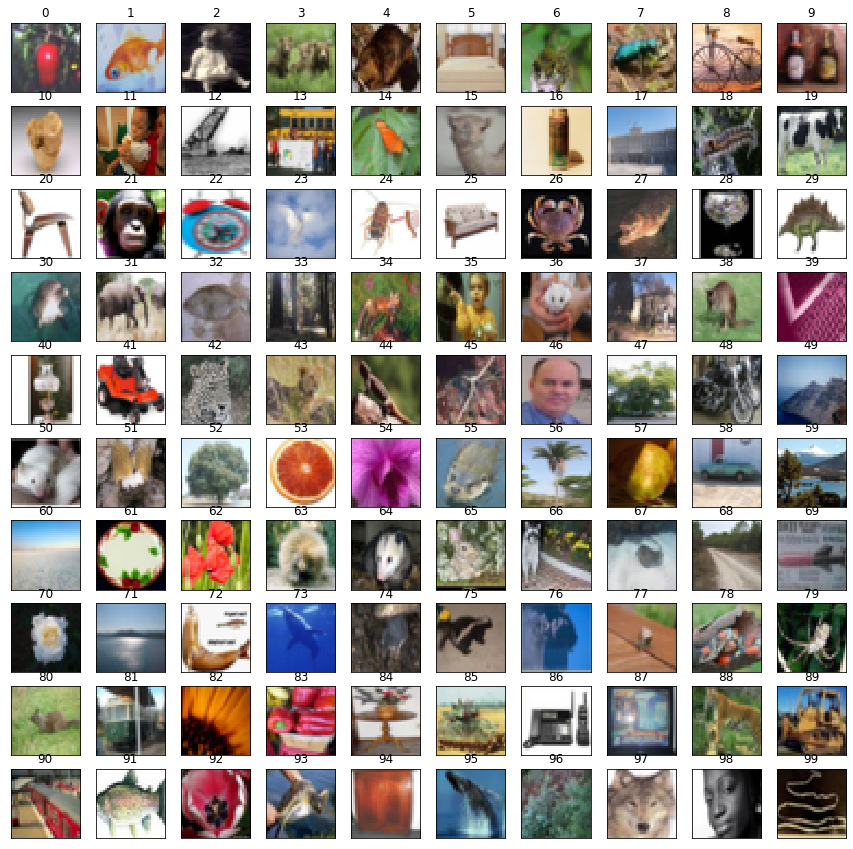

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(_y_train)
num_classes = len(class_names)

fig, axes = plt.subplots(10, 10,figsize=(15,15))
for i in range(num_classes):
    ax = axes.flatten()[i]
    indices = np.where(np.isin(_y_train, class_names[i]))[0]
    ax.imshow(_x_train[int(np.random.choice(indices, 1))])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(i)
plt.show()

In [47]:
# Data pre-processing
x_val = _x_train[40000:]
y_val = _y_train[40000:]
x_train = _x_train[:40000]
y_train = _y_train[:40000]
x_test = _x_test
y_test = _y_test

# Normalize the images to be values in range [0, 1]
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

from keras.utils import np_utils
# Converts a class vector (integers) to binary class matrix
tr_labels = np_utils.to_categorical(y_train, num_classes)
va_labels = np_utils.to_categorical(y_val, num_classes)
te_labels = np_utils.to_categorical(y_test, num_classes)

CIFAR_SIZE = (32, 32)

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
import keras

input_shape = (CIFAR_SIZE[0], CIFAR_SIZE[1], 3)

cnn = Sequential()
cnn.add(Conv2D(8, kernel_size=(3, 3), padding='same', input_shape=input_shape))
cnn.add(Activation('relu'))
cnn.add(Conv2D(16, strides=(2, 2), kernel_size=(3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(32, strides=(2, 2), kernel_size=(3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(num_classes))
cnn.add(Activation('softmax'))


cnn.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
cnn.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
activation_76 (Activation)   (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
activation_77 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
activation_78 (Activation)   (None, 8, 8, 32)        

In [49]:
data = cnn.fit(x_train, tr_labels, batch_size=16, epochs=10, verbose=2, validation_data=(x_val, va_labels))

start = time()
loss, acc = cnn.evaluate(x_test, te_labels, verbose=0)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 12s - loss: 3.8864 - accuracy: 0.1152 - val_loss: 3.4928 - val_accuracy: 0.1879
Epoch 2/10
 - 12s - loss: 3.3583 - accuracy: 0.2088 - val_loss: 3.2187 - val_accuracy: 0.2408
Epoch 3/10
 - 12s - loss: 3.1597 - accuracy: 0.2455 - val_loss: 3.1670 - val_accuracy: 0.2475
Epoch 4/10
 - 11s - loss: 3.0486 - accuracy: 0.2673 - val_loss: 3.0648 - val_accuracy: 0.2684
Epoch 5/10
 - 11s - loss: 2.9689 - accuracy: 0.2839 - val_loss: 3.0850 - val_accuracy: 0.2663
Epoch 6/10
 - 12s - loss: 2.9118 - accuracy: 0.2962 - val_loss: 3.0026 - val_accuracy: 0.2745
Epoch 7/10
 - 11s - loss: 2.8685 - accuracy: 0.3034 - val_loss: 3.0212 - val_accuracy: 0.2752
Epoch 8/10
 - 11s - loss: 2.8374 - accuracy: 0.3115 - val_loss: 3.0811 - val_accuracy: 0.2729
Epoch 9/10
 - 11s - loss: 2.8153 - accuracy: 0.3132 - val_loss: 2.9084 - val_accuracy: 0.3011
Epoch 10/10
 - 12s - loss: 2.7957 - accuracy: 0.3188 - val_loss: 2.9548 - val_accuracy: 0.2902
CNN took 

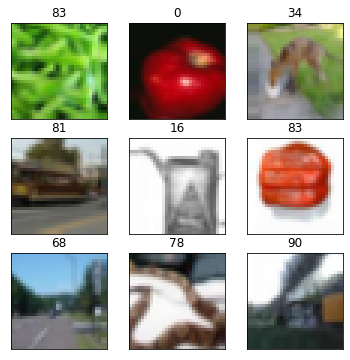

In [50]:
import cv2

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, fill_mode='nearest')
datagen.fit(x_train, augment=True)

for x_batch, y_batch in datagen.flow(x_train, tr_labels, batch_size=9):
    # create a grid of 3x3 images
    fig = plt.figure(figsize=(6,6))
    for i in range(0, 9):
        ax = fig.add_subplot(3, 3, 1 + i, xticks=[], yticks=[])
        ax.set_title(np.argmax(y_batch[i]))
        plt.imshow(x_batch[i])
    # show the plot
    plt.show()
    break

In [66]:
cnn = Sequential()
cnn.add(Conv2D(8, kernel_size=(3, 3), padding='same', input_shape=input_shape))
cnn.add(Activation('relu'))
cnn.add(Conv2D(16, strides=(2, 2), kernel_size=(3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(32, strides=(2, 2), kernel_size=(3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(num_classes))
cnn.add(Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
cnn.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
cnn.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
activation_86 (Activation)   (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
activation_87 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
activation_88 (Activation)   (None, 8, 8, 32)        

In [67]:

train_steps = int(len(x_train) / 16)
valid_steps = int(len(x_val) / 16)
data = cnn.fit_generator(datagen.flow(x_train, tr_labels, batch_size=16), 
                         epochs=20, 
                         steps_per_epoch=train_steps, 
                         verbose=2, 
                         validation_data=(x_val, va_labels), 
                         validation_steps=valid_steps)

start = time()
loss, acc = cnn.evaluate(x_test, te_labels, verbose=2)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Epoch 1/20
 - 16s - loss: 4.3032 - accuracy: 0.0495 - val_loss: 3.9585 - val_accuracy: 0.1097
Epoch 2/20
 - 17s - loss: 3.9362 - accuracy: 0.1044 - val_loss: 3.7335 - val_accuracy: 0.1462
Epoch 3/20
 - 17s - loss: 3.7716 - accuracy: 0.1349 - val_loss: 3.5901 - val_accuracy: 0.1764
Epoch 4/20
 - 16s - loss: 3.6568 - accuracy: 0.1532 - val_loss: 3.4999 - val_accuracy: 0.1840
Epoch 5/20
 - 16s - loss: 3.5823 - accuracy: 0.1677 - val_loss: 3.4344 - val_accuracy: 0.1975
Epoch 6/20
 - 16s - loss: 3.5202 - accuracy: 0.1788 - val_loss: 3.3653 - val_accuracy: 0.2136
Epoch 7/20
 - 16s - loss: 3.4666 - accuracy: 0.1869 - val_loss: 3.3333 - val_accuracy: 0.2170
Epoch 8/20
 - 16s - loss: 3.4158 - accuracy: 0.1984 - val_loss: 3.2920 - val_accuracy: 0.2264
Epoch 9/20
 - 16s - loss: 3.3689 - accuracy: 0.2086 - val_loss: 3.2595 - val_accuracy: 0.2344
Epoch 10/20
 - 16s - loss: 3.3341 - accuracy: 0.2134 - val_loss: 3.2211 - val_accuracy: 0.2414
Epoch 11/20
 - 16s - loss: 3.3036 - accuracy: 0.2183 - val_